In [249]:
import pandas as pd
import numpy  as np

import data file

In [250]:
df = pd.read_csv('data_new.csv')
df.describe()

,Label
count,329.000000
mean,0.589666
std,0.492644
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


split data

In [251]:
print("Non-cheat: ", len(df[df['Label']==0]))
print("Cheat: ", len(df[df['Label']==1]))

# diff = abs(len(df[df['Label']==0]) - len(df[df['Label']==1]))

grouped = df.groupby(df.Label)
df1 = grouped.get_group(1)
df2 = grouped.get_group(0)

df2_1 = df2.iloc[:135,:]
df2_2 = df2.iloc[135:194,:]

df1_train = df1.iloc[:111,:]
df2_train = df2_1.iloc[:111,:]

df1_test = df1.iloc[111:135,:]
df2_test = df2_1.iloc[111:135,:]

train = pd.concat([df1_train, df2_train])
test  = pd.concat([df1_test, df2_test, df2_2])

# shuffle data
train = train.sample(frac=1)
test  = test.sample(frac=1)

print((len(train), len(test)))

Non-cheat:  135
Cheat:  194
(222, 48)


In [252]:
print("Non-cheat in trainsets: ", len(train[train['Label']==0]))
print("Cheat in trainsets: ", len(train[train['Label']==1]))

Non-cheat in trainsets:  111
Cheat in trainsets:  111


parse data from string to numpy array

In [253]:
def parseData(series):
    final_series = []
    for ser in series:
        temp = []
        for x in "[],":
            ser = ser.replace(x, "")
        new_ser  = np.fromstring(ser, dtype=float, sep=" ")
        for i in range(0, len(new_ser), 3):
            chunk = [new_ser[i], new_ser[i + 1], new_ser[i + 2]]
            temp.append(chunk)
        final_series.append(temp)
    return np.array(final_series, dtype=object)

get the longest sequence of vector in dataset

In [254]:
max_length = 0
for lgaze in parseData(df['Left Gaze']):
    if len(lgaze) > max_length:
        max_length = len(lgaze)
        
max_length

1294

pad the dataset to the longest sequence size

In [255]:
import math

def padData(series, length):
    for idx, ser in enumerate(series):
        times = math.floor(length / len(ser))
        add = length % len(ser)
        
        temp = ser[::-1]
        for _ in range(1, times):
            series[idx] = np.append(series[idx], temp, axis=0)
            temp = temp[::-1]
        if add != 0:
            series[idx] = np.append(series[idx], temp[0:add], axis=0)
    return series

Conv1D -> AveragePooling1D -> Conv1D -> AveragePooling1D -> LSTM -> Dense

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, AveragePooling1D, LSTM, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, History

import tensorflow as tf

def init_model_38():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [257]:
def init_model_33():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [258]:
def init_model_35():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [259]:
def init_model_36():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [260]:
def init_model_37():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [261]:
def init_model_45():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    
    model.add(LSTM(12))
    
    adam = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [262]:
right_gaze_train = train["Right Gaze"]
left_gaze_train  = train["Left Gaze"]
right_head_train = train["Right HeadPose"]
left_head_train  = train["Left HeadPose"]

label_train = train['Label']

right_gaze_train, left_gaze_train, right_head_train, left_head_train = parseData(right_gaze_train), parseData(left_gaze_train), parseData(right_head_train), parseData(left_head_train)

initialize new data frame

In [263]:
left_head_train  = padData(left_head_train,  max_length)
right_head_train = padData(right_head_train, max_length)
left_gaze_train  = padData(left_gaze_train,  max_length)
right_gaze_train = padData(right_gaze_train, max_length)

In [264]:
label_train = np.array(label_train)

In [265]:
y_train = []
for i in range(len(label_train)):
    y_train.append(
        tf.convert_to_tensor(
            np.reshape(tf.keras.utils.to_categorical(label_train[i], num_classes=2), (1, 2))                 
                            )
             )
    
y_train = tf.convert_to_tensor(np.vstack(y_train), dtype=tf.float32)

In [266]:
x_train = []

for i in range(len(left_gaze_train)):
    x_train.append(tf.convert_to_tensor([
                                            np.hstack(
                                                        (left_gaze_train[i], right_gaze_train[i], left_head_train[i], right_head_train[i])
                                                     )
                                            ], dtype=tf.float32))



x_train = tf.convert_to_tensor(np.vstack(x_train), dtype=tf.float32)

print(x_train)

print(y_train)

tf.Tensor(
[[[ -1.382  28.187 -28.221 ...   6.707   2.788   7.264]
  [  5.656  31.011  31.523 ...  10.207   3.289  10.724]
  [  9.22   30.034  31.417 ...   7.057  -5.121   8.719]
  ...
  [  2.36    9.203   9.501 ...   5.435 -11.421  12.648]
  [  9.318  14.225  17.005 ...   4.445 -11.692  12.509]
  [ 11.962  10.637  16.008 ...   6.884 -11.436  13.348]]

 [[ 28.678  21.249  35.693 ...  22.896  14.792  27.259]
  [ 23.722  25.904  35.124 ...  13.787  21.24   25.322]
  [ 21.455  33.225  39.551 ...   5.358  29.887  30.363]
  ...
  [ 13.977  73.342  74.662 ... -21.408  80.903 -83.687]
  [ 10.534  76.314  77.038 ... -22.389  78.459 -81.592]
  [ 11.495  74.187  75.073 ... -24.004  77.375 -81.013]]

 [[ -6.244  33.211 -33.793 ...   8.802  16.126  18.372]
  [ -1.074  30.908 -30.926 ...   9.715  11.446  15.013]
  [ 11.383  23.78   26.364 ...  27.407   4.25   27.735]
  ...
  [-20.486  14.628 -25.172 ...  -4.297   0.989  -4.409]
  [ -9.598  13.735 -16.756 ...   7.151   3.127   7.805]
  [-11.377   9.

In [267]:
def init_model_46():
    model = Sequential()
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=12, kernel_size=3, padding="same", activation='relu', input_shape=(max_length, 12)))
    
    model.add(LSTM(12))
    
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax')) # We have only 2 classes: Non-cheat & Cheat
    
    adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    
    return model

Train the model

In [268]:
models = [init_model_33(), init_model_35(),init_model_36(), init_model_37(),init_model_38(), init_model_45()]
histories = []
recalls = []
# callbacks = [EarlyStopping(monitor='loss', patience=3), History()]
callbacks = [History()]
for model in models:
    history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split =0.1,  callbacks=callbacks)
    histories.append(history)

c:\conda\envs\Tensorflow_RTX_Ampere\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
2/2 [==============================] - 2s 561ms/step - loss: 0.6968 - accuracy: 0.5327 - val_loss: 0.6838 - val_accuracy: 0.4348
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6807 - accuracy: 0.5729 - val_loss: 0.6834 - val_accuracy: 0.5652
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6696 - accuracy: 0.6030 - val_loss: 0.6851 - val_accuracy: 0.5217
Epoch 4/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6601 - accuracy: 0.6080 - val_loss: 0.6884 - val_accuracy: 0.4348
Epoch 5/100
2/2 [==============================] - 0s 64ms/step - loss: 0.6526 - accuracy: 0.6281 - val_loss: 0.6900 - val_accuracy: 0.3913
Epoch 6/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6479 - accuracy: 0.6281 - val_loss: 0.6906 - val_accuracy: 0.3913
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6449 - accuracy: 0.6281 - val_loss: 0.6900 - val_accuracy: 0.3913
Epoch 8/100
2/2 [==

In [269]:
for layer in model.layers:
    print(layer.output_shape)

(None, 1294, 12)
(None, 647, 12)
(None, 647, 12)
(None, 647, 12)
(None, 323, 12)
(None, 12)
(None, 12)
(None, 2)


Predict test set

In [270]:
right_gaze_test = test["Right Gaze"]
left_gaze_test  = test["Left Gaze"]
right_head_test = test["Right HeadPose"]
left_head_test  = test["Left HeadPose"]

label_test = test['Label']

right_gaze_test, left_gaze_test, right_head_test, left_head_test = parseData(right_gaze_test), parseData(left_gaze_test), parseData(right_head_test), parseData(left_head_test)

In [271]:
left_head_test  = padData(left_head_test,  max_length)
right_head_test = padData(right_head_test, max_length)
left_gaze_test  = padData(left_gaze_test,  max_length)
right_gaze_test = padData(right_gaze_test, max_length)

In [272]:
x_test = []

for i in range(len(left_gaze_test)):
    x_test.append(tf.convert_to_tensor([
                                            np.hstack(
                                                        (left_gaze_test[i], right_gaze_test[i], left_head_test[i], right_head_test[i])
                                                     )
                                            ], dtype=tf.float32))



x_test = tf.convert_to_tensor(np.vstack(x_test), dtype=tf.float32)

print(x_test)

tf.Tensor(
[[[-30.842  29.423 -42.626 ... -19.488  18.949 -27.182]
  [-27.754  35.781 -45.283 ... -12.957  19.953 -23.791]
  [-24.957  36.39  -44.126 ... -15.066  18.399 -23.781]
  ...
  [-22.96   33.787 -40.85  ... -12.419  23.152 -26.273]
  [-19.963  39.413 -44.18  ...  -7.789  25.312 -26.484]
  [-10.705  44.444 -45.715 ...  -8.201  22.595 -24.037]]

 [[ 27.151  -2.31   27.249 ...  17.677   5.521  18.519]
  [ 10.049  39.664  40.917 ...   4.425  16.695  17.271]
  [ -3.938  40.457 -40.648 ...  -1.816  28.817 -28.874]
  ...
  [ 32.216   8.621  33.35  ...  46.066   0.491  46.068]
  [ 27.958  10.575  29.891 ...  41.71    0.603  41.714]
  [ 41.273  19.257  45.544 ...  41.396  -4.189  41.608]]

 [[ -8.005  83.613 -83.996 ...  -8.876  73.29  -73.826]
  [-10.669  82.863 -83.547 ...  -7.906  68.514 -68.968]
  [ -9.81   82.016 -82.6   ...  -4.808  70.742 -70.905]
  ...
  [ 28.952  59.983  66.604 ...  -8.003  76.504 -76.922]
  [ 14.985  37.377  40.269 ...  13.966  81.658  82.844]
  [ 27.608  66.

In [273]:
from sklearn.metrics import recall_score, precision_score, f1_score
recalls = []
precisions = []
f1s = []
for model in models:
    predictions = model.predict(x_test)
    recall = recall_score(label_test, np.argmax(predictions, axis=1))
    recalls.append(recall)
    precision = precision_score(label_test, np.argmax(predictions, axis=1))
    precisions.append(precision)
    f1 = f1_score(label_test, np.argmax(predictions, axis=1))
    f1s.append(f1)

# print(recalls)
# label_predictions = []

# convert from category to label
# for prediction in predictions:
#     if prediction[0] > prediction[1]:
#         label_predictions.append(0)
#     else: label_predictions.append(1)
    
# label_predictions = np.array(label_predictions)
# label_test = np.array(label_test)

# print(label_predictions)
# print(label_test)

# # calc acc
# true_count = 0
# for idx, label in enumerate(label_predictions):
#     if label == label_test[idx]:
#         true_count += 1
        
# print("Accuracy on test set: ", true_count/(len(label_test)))

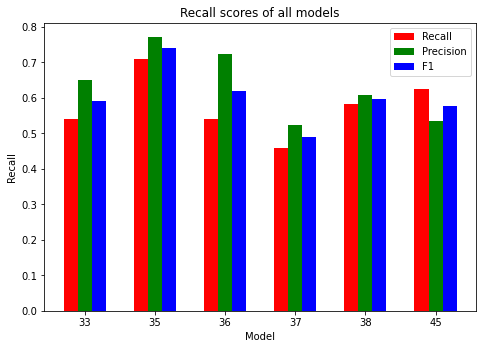

In [274]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['33', '35', '36', '37', '38', '45']
x_axis = np.arange(len(langs))
ax.bar(x_axis-0.2,recalls, width=0.2, color='r', label= "Recall")
ax.bar(x_axis,precisions, width=0.2, color = 'g', label= "Precision")
ax.bar(x_axis+0.2,f1s, width=0.2, color = 'b', label= "F1")
plt.xticks((x_axis), langs)
ax.title.set_text('Recall scores of all models')
ax.set_xlabel('Model')
ax.set_ylabel('Recall')
plt.legend()
plt.show()

In [275]:
df  = pd.read_csv('data_20s.csv')
df.describe()

,Label
count,3239.000000
mean,0.502007
std,0.500073
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [276]:
def parseData(series):
    final_series = []
    for ser in series:
        temp = []
        for x in "[],":
            ser = ser.replace(x, "")
        new_ser  = np.fromstring(ser, dtype=float, sep=" ")
        for i in range(0, len(new_ser), 3):
            chunk = [new_ser[i], new_ser[i + 1], new_ser[i + 2]]
            temp.append(chunk)
        final_series.append(temp)
    return np.array(final_series, dtype=object)

In [277]:
max_length = 0
for lgaze in parseData(df['Left Gaze']):
    if len(lgaze) > max_length:
        max_length = len(lgaze)
        
print(max_length)

min_length = max_length
indices = []
for idx, lgaze in enumerate(parseData(df['Left Gaze'])):
    if len(lgaze) <= min_length:
        min_length = len(lgaze)
        print(min_length, idx)
    if len(lgaze) == 0:
        indices.append(idx)

print(min_length, indices)

599
598 0
597 1
537 2
451 7
298 36
98 58
97 188
97 302
80 750
44 1976
0 1977
0 1978
0 1979
0 1980
0 [1977, 1978, 1979, 1980]


In [278]:
df = df.drop(indices)
df = df.drop([58, 188, 302, 80, 44])

In [279]:
print("Non-cheat: ", len(df[df['Label']==0]))
print("Cheat: ", len(df[df['Label']==1]))

grouped = df.groupby(df.Label)
df1 = grouped.get_group(1)
df2 = grouped.get_group(0)

df2_1 = df2.iloc[:1609,:]
df2_2 = df2.iloc[1609:1626,:]

df1_train = df1.iloc[:1126,:]
df2_train = df2_1.iloc[:1126,:]

df1_test = df1.iloc[1126:1609,:]
df2_test = df2_1.iloc[1126:1609,:]

train = pd.concat([df1_train, df2_train])
test  = pd.concat([df1_test, df2_test, df2_2])

# shuffle the train set
train = train.sample(frac=1)

print((len(train), len(test)))

Non-cheat:  1609
Cheat:  1621
(2252, 966)


In [280]:
print("Non-cheat in train: ", len(train[train['Label']==0]))
print("Cheat in train: ", len(train[train['Label']==1]))

Non-cheat in train:  1126
Cheat in train:  1126


In [281]:
import math

def padData(series, length):
    for idx, ser in enumerate(series):
        times = math.floor(length / len(ser))
        add = length % len(ser)
        
        temp = ser[::-1]
        for _ in range(1, times):
            series[idx] = np.append(series[idx], temp, axis=0)
            temp = temp[::-1]
        if add != 0:
            series[idx] = np.append(series[idx], temp[0:add], axis=0)
    return series

In [282]:
right_gaze_train = train["Right Gaze"]
left_gaze_train  = train["Left Gaze"]
right_head_train = train["Right HeadPose"]
left_head_train  = train["Left HeadPose"]

label_train = train['Label']

right_gaze_train, left_gaze_train, right_head_train, left_head_train = parseData(right_gaze_train), parseData(left_gaze_train), parseData(right_head_train), parseData(left_head_train)

In [283]:
left_head_train  = padData(left_head_train,  max_length)
right_head_train = padData(right_head_train, max_length)
left_gaze_train  = padData(left_gaze_train,  max_length)
right_gaze_train = padData(right_gaze_train, max_length)

In [284]:
label_train = np.array(label_train)

In [285]:
y_train = []
for i in range(len(label_train)):
    y_train.append(
        tf.convert_to_tensor(
            np.reshape(tf.keras.utils.to_categorical(label_train[i], num_classes=2), (1, 2))                 
                            )
             )
    
y_train = tf.convert_to_tensor(np.vstack(y_train), dtype=tf.float32)

In [286]:
x_train = []

for i in range(len(left_gaze_train)):
    x_train.append(tf.convert_to_tensor([
                                            np.hstack(
                                                        (left_gaze_train[i], right_gaze_train[i], left_head_train[i], right_head_train[i])
                                                     )
                                            ], dtype=tf.float32))



x_train = tf.convert_to_tensor(np.vstack(x_train), dtype=tf.float32)

print(x_train)

print(y_train)

tf.Tensor(
[[[-27.853  27.991  39.488 ... -47.324  31.712  56.967]
  [-28.921  28.055  40.292 ... -48.914  31.442  58.148]
  [-27.5    27.119  38.622 ... -48.665  30.086  57.215]
  ...
  [-25.189  58.553  63.742 ... -69.147  70.691  98.886]
  [-26.093  57.239  62.906 ... -67.727  71.413  98.421]
  [-26.093  57.239  62.906 ... -67.727  71.413  98.421]]

 [[-19.541  36.441  41.349 ... -30.472  17.887  35.333]
  [-21.496  37.822  43.504 ... -30.264  21.347  37.035]
  [-19.52   36.588  41.469 ... -27.84   19.561  34.025]
  ...
  [-15.336  48.173  50.555 ... -25.339  25.622  36.035]
  [-18.128  53.063  56.074 ... -21.162  34.849  40.771]
  [-19.083  52.702  56.05  ... -22.54   34.221  40.978]]

 [[-22.094  85.045  87.868 ... -12.05   54.932  56.238]
  [-21.055  87.359  89.86  ... -14.815  59.382  61.202]
  [-20.165  87.755  90.042 ... -15.641  61.025  62.997]
  ...
  [ 20.334  -5.793  21.143 ...  38.354  84.927  93.186]
  [ 20.334  -5.793  21.143 ...  38.354  84.927  93.186]
  [ 19.27   -4.

In [287]:
right_gaze_test = test["Right Gaze"]
left_gaze_test  = test["Left Gaze"]
right_head_test = test["Right HeadPose"]
left_head_test  = test["Left HeadPose"]

label_test = test['Label']

right_gaze_test, left_gaze_test, right_head_test, left_head_test = parseData(right_gaze_test), parseData(left_gaze_test), parseData(right_head_test), parseData(left_head_test)

In [288]:
left_head_test  = padData(left_head_test,  max_length)
right_head_test = padData(right_head_test, max_length)
left_gaze_test  = padData(left_gaze_test,  max_length)
right_gaze_test = padData(right_gaze_test, max_length)

In [289]:
x_test = []

for i in range(len(left_gaze_test)):
    x_test.append(tf.convert_to_tensor([
                                            np.hstack(
                                                        (left_gaze_test[i], right_gaze_test[i], left_head_test[i], right_head_test[i])
                                                     )
                                            ], dtype=tf.float32))



x_test = tf.convert_to_tensor(np.vstack(x_test), dtype=tf.float32)

print(x_test)

tf.Tensor(
[[[ 45.679  22.428  50.888 ...  33.667  25.695  42.352]
  [ 43.788  21.278  48.684 ...  32.631  25.063  41.145]
  [ 46.069  18.498  49.644 ...  33.921  23.145  41.065]
  ...
  [-17.37   40.155  43.751 ... -34.259  44.602  56.241]
  [-17.01   40.044  43.507 ... -33.2    45.901  56.649]
  [-17.01   40.044  43.507 ... -33.2    45.901  56.649]]

 [[ -0.78   47.38   47.386 ... -14.949  46.261  48.616]
  [ -0.814  49.463  49.47  ... -14.005  47.321  49.35 ]
  [ -2.568  49.585  49.651 ... -15.153  47.398  49.761]
  ...
  [-14.199  42.451  44.763 ... -30.818  44.764  54.347]
  [-13.25   41.417  43.485 ... -28.174  44.116  52.345]
  [-13.25   41.417  43.485 ... -28.174  44.116  52.345]]

 [[-12.117  40.077  41.869 ... -27.04   44.452  52.03 ]
  [ -8.297  42.745  43.543 ... -22.644  46.491  51.712]
  [-10.743  41.512  42.88  ... -25.538  46.89   53.393]
  ...
  [-11.666  42.979  44.534 ... -32.526  49.787  59.47 ]
  [ -9.657  43.32   44.383 ... -29.719  50.7    58.768]
  [ -9.657  43.

In [290]:
model_46 = init_model_46()
history = model_46.fit(x_train, y_train, epochs=100, batch_size=128, validation_split =0.1,  callbacks=callbacks)
histories.append(history)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 599, 12)           444       
_________________________________________________________________
average_pooling1d_125 (Avera (None, 299, 12)           0         
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 299, 12)           444       
_________________________________________________________________
lstm_48 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)               

In [291]:
predictions = model_46.predict(x_test)
recall = recall_score(label_test, np.argmax(predictions, axis=1))
recalls.append(recall)
precision = precision_score(label_test, np.argmax(predictions, axis=1))
precisions.append(precision)
f1 = f1_score(label_test, np.argmax(predictions, axis=1))
f1s.append(f1)
print(recalls)

[0.5416666666666666, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.5833333333333334, 0.625, 0.7929606625258799]


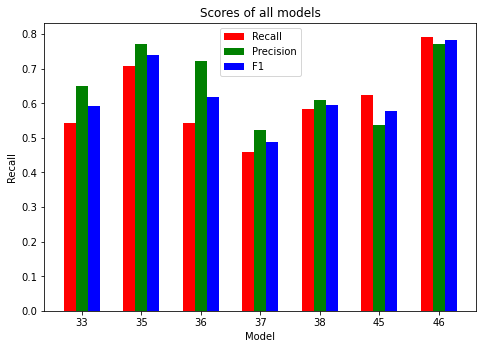

In [298]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['33', '35', '36', '37', '38', '45', '46']
x_axis = np.arange(len(langs))
ax.bar(x_axis-0.2,recalls, width=0.2, color='r', label= "Recall")
ax.bar(x_axis,precisions, width=0.2, color = 'g', label= "Precision")
ax.bar(x_axis+0.2,f1s, width=0.2, color = 'b', label= "F1")
plt.xticks((x_axis), langs)
ax.title.set_text('Scores of all models')
ax.set_xlabel('Model')
ax.set_ylabel('Recall')
plt.legend()
plt.show()

In [293]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [294]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

plot the loss and acc from training process

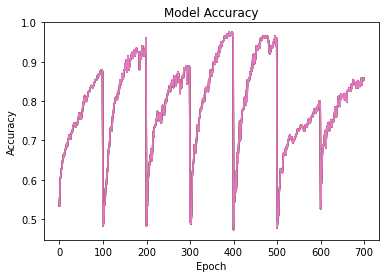

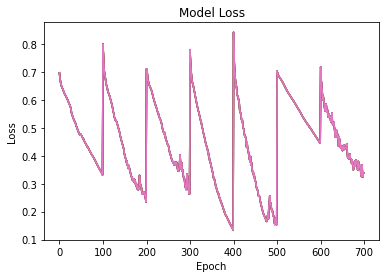

In [295]:
from matplotlib import pyplot as plt
# Plot accuracy
for history in histories:
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
plt.show()

for history in histories: # Plot loss
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
plt.show()


In [296]:
model.save('GP038.keras')